In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
import tkinter as tk
from tkinter import messagebox

In [27]:
df = pd.read_csv('NFLX.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [28]:
# Handle missing values
df.dropna(inplace=True)

In [29]:
#get number of trading days
df.shape

(1009, 7)

In [30]:
pd.isnull(df).sum()


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

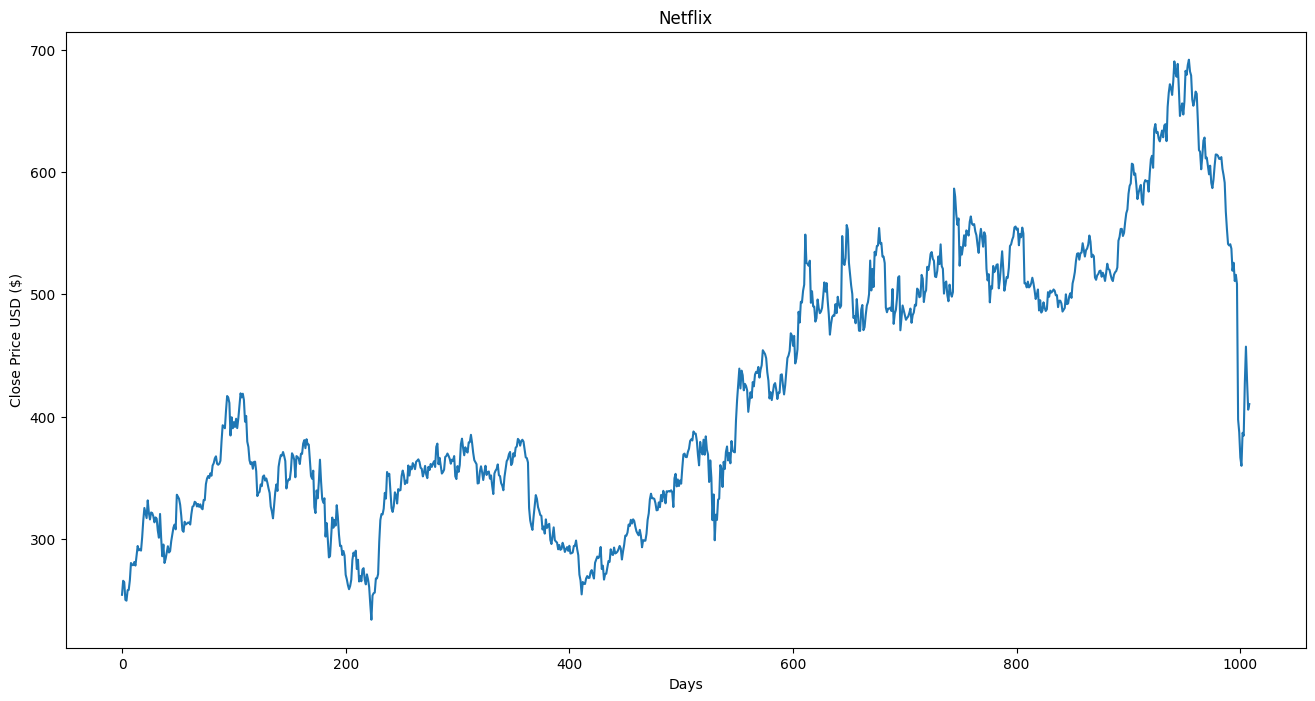

In [31]:
#Visualize the close price Data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '4/23/2021'),
  Text(0.0, 0, '2/5/2018'),
  Text(200.0, 0, '11/19/2018'),
  Text(400.0, 0, '9/9/2019'),
  Text(600.0, 0, '6/24/2020'),
  Text(800.0, 0, '4/12/2021'),
  Text(1000.0, 0, '1/25/2022'),
  Text(1200.0, 0, '')])

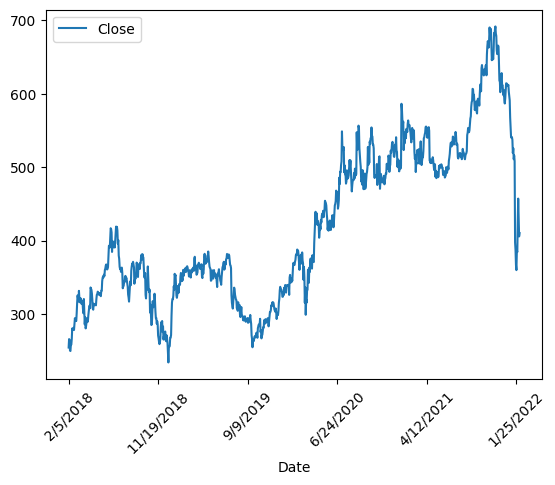

In [32]:
df.plot(x='Date' , y='Close')
plt.xticks(rotation=45)

In [33]:
df.duplicated().sum().any()

False

In [34]:
df.isnull().values.any()

False

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [36]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [37]:
X = df[['Open','High','Low','Volume']].values 
y = df[['Close']].values

In [38]:
# Feature Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [40]:
# Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [41]:
print("Train",X_train.shape)
print("Test",X_test.shape)

Train (807, 4)
Test (202, 4)


In [42]:
# Fit the model with best parameters
best_classifier = grid_search.best_estimator_
best_classifier.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=5)

In [43]:
# Predictions
y_pred = best_classifier.predict(X_test)

In [44]:
#print the actual values
print('Actual Values :', y_test)


Actual Values : [[509.640015]
 [494.730011]
 [500.859985]
 [380.070007]
 [315.100006]
 [476.26001 ]
 [495.98999 ]
 [298.839996]
 [359.309998]
 [328.190002]
 [521.659973]
 [332.700012]
 [591.150024]
 [312.48999 ]
 [340.660004]
 [547.919983]
 [532.390015]
 [612.090027]
 [351.140015]
 [391.429993]
 [386.700012]
 [366.420013]
 [269.700012]
 [354.640015]
 [436.130005]
 [375.220001]
 [310.100006]
 [353.369995]
 [297.809998]
 [510.720001]
 [566.179993]
 [512.73999 ]
 [411.089996]
 [338.049988]
 [510.399994]
 [349.290009]
 [582.070007]
 [290.299988]
 [356.869995]
 [365.359985]
 [353.160004]
 [349.920013]
 [343.279999]
 [614.090027]
 [370.459991]
 [361.410004]
 [310.829987]
 [634.809998]
 [505.549988]
 [547.580017]
 [495.649994]
 [522.419983]
 [313.299988]
 [488.880005]
 [421.380005]
 [565.169983]
 [308.929993]
 [307.019989]
 [331.440002]
 [317.5     ]
 [510.820007]
 [275.299988]
 [278.549988]
 [482.029999]
 [515.840027]
 [335.829987]
 [294.179993]
 [286.209991]
 [345.089996]
 [629.76001 ]
 [41

In [45]:
print('Predicted Values :', y_pred)

Predicted Values : [509.45999167 491.597496   511.529999   386.3224945  324.9400025
 483.97333767 487.7299955  319.532501   360.164993   329.43249525
 524.1900025  332.0250015  586.376648   315.69000267 337.98000067
 552.335022   534.76000975 625.2600095  349.050003   398.285004
 374.4349975  386.3224945  269.300003   355.05249025 435.205002
 369.1549985  310.2000045  351.54666167 296.78333533 503.8224945
 568.355011   516.45999125 419.209999   334.56999733 511.529999
 348.13666767 575.44333933 287.334999   363.119995   369.5374985
 358.91666633 352.067497   345.69249725 613.30000275 372.584999
 361.41333    310.2000045  610.9275055  509.45999167 550.51666267
 487.7299955  512.25001    307.21000167 486.2599945  426.72000125
 568.355011   312.02667233 317.8549955  324.8300015  318.14249425
 510.91249075 284.95000233 281.534988   476.70749675 516.456665
 328.56500275 294.44666567 288.29666133 342.084999   625.2600095
 419.209999   263.934998   277.55999767 337.98000067 521.823344
 369.15

In [46]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Median Absolute Error:", medae)
print("R2 score:", r2)

Mean Squared Error: 46.27005344999498
Mean Absolute Error: 4.769497665429045
Median Absolute Error: 3.544586124999995
R2 score: 0.9960317478242905


In [50]:
def predict_stock_price(open_price, high_price, low_price, volume):
    input_data = np.array([open_price, high_price, low_price, volume]).reshape(1, -1)
    predicted_price = best_classifier.predict(input_data)
    return predicted_price[0]
# User input
user_open = float(input("Enter the Open price: "))
user_high = float(input("Enter the High price: "))
user_low = float(input("Enter the Low price: "))
user_volume = float(input("Enter the Volume: "))

# Predict using user input
predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
print(f"Predicted Close Price: {predicted_stock_price}")

Predicted Close Price: 250.47666900000002


In [51]:
def on_predict():
    try:
        # Get user input from entry fields
        user_open = float(entry_open.get())
        user_high = float(entry_high.get())
        user_low = float(entry_low.get())
        user_volume = float(entry_volume.get())
        
        # Predict using user input
        predicted_stock_price = predict_stock_price(user_open, user_high, user_low, user_volume)
        
        # Show predicted price in a message box
        messagebox.showinfo("Prediction", f"Predicted Close Price: {predicted_stock_price}")
        messagebox.showinfo("ACC", f"accuracy of model: {round(r2_score(y_test,y_pred), 3) * 100}")
        
    except Exception as e:
        print("Exception occurred:", e)  # Print the exception for debugging
        # Show error message if input is invalid
        messagebox.showerror("Error", "Please enter valid numerical values for all fields.")

In [52]:
#Here GUI Starts
root = tk.Tk()
root.title("Stock Price Prediction")


root.geometry("600x200")
root.config(bg="lightblue")

header = tk.Label(root,text="NETFLIX Pricing",bg="lightblue",
     foreground="black",font=("Arial",15,"bold"))
header.grid(row=0,column=2, pady=5)
frame1= tk.Frame(root,bg="lightblue")
frame1.grid()

# Create labels and entry fields for user input
label_open = tk.Label(root, text="Open Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_open.grid(row=1, column=0,pady=10)
entry_open = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_open.grid(row=1, column=1,pady=10)

label_high = tk.Label(root, text="High Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_high.grid(row=1, column=2,pady=10)
entry_high = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_high.grid(row=1, column=3,pady=10)

label_low = tk.Label(root, text="Low Price:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_low.grid(row=2, column=0,pady=10)
entry_low = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_low.grid(row=2, column=1,pady=10)

label_volume = tk.Label(root, text="Volume:",bg="lightblue",foreground="black",
     font=("Arial",15,"bold"))
label_volume.grid(row=2, column=2,pady=10)
entry_volume = tk.Entry(root,width=10,font=("Arial",15,"bold"),bg="gray",fg="white",
     borderwidth=3)
entry_volume.grid(row=2, column=3,pady=10)




# Create a predict button
predict_button = tk.Button(root, text="Predict",bg="green",activebackground="blue",
      borderwidth=3,font=("Arial",15,"bold"), command=on_predict)
predict_button.grid(row=4,column=2)

# Start the GUI application
root.mainloop()
